# Week 2 data exploration

In [1]:
import sys
sys.path.append("..")
from common.download_utils import download_week2_resources

download_week2_resources()

File data/train.txt is already downloaded.
File data/validation.txt is already downloaded.
File data/test.txt is already downloaded.


In [2]:
import re
def read_data(file_path):
    tokens = []
    tags = []
    
    tweet_tokens = []
    tweet_tags = []
    for line in open(file_path, encoding='utf-8'):
        line = line.strip()
        if not line:
            if tweet_tokens:
                tokens.append(tweet_tokens)
                tags.append(tweet_tags)
            tweet_tokens = []
            tweet_tags = []
        else:
            token, tag = line.split()
            url_regex = '(http|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
            usr_regex = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([_A-Za-z]+[A-Za-z0-9-_]+)' # this matches twitter handles without matching emails
            
            token = re.sub(url_regex, '<URL>', token)
            token = re.sub(usr_regex, '<USR>', token)

            tweet_tokens.append(token)
            tweet_tags.append(tag)
            
    return tokens, tags

In [3]:
train_tokens, train_tags = read_data('data/train.txt')
validation_tokens, validation_tags = read_data('data/validation.txt')
test_tokens, test_tags = read_data('data/test.txt')

In [4]:
for i in range(3):
    for token, tag in zip(train_tokens[i], train_tags[i]):
        print('%s\t%s' % (token, tag))
    print()

RT	O
<USR>	O
:	O
Online	O
ticket	O
sales	O
for	O
Ghostland	B-musicartist
Observatory	I-musicartist
extended	O
until	O
6	O
PM	O
EST	O
due	O
to	O
high	O
demand	O
.	O
Get	O
them	O
before	O
they	O
sell	O
out	O
...	O

Apple	B-product
MacBook	I-product
Pro	I-product
A1278	I-product
13.3	I-product
"	I-product
Laptop	I-product
-	I-product
MD101LL/A	I-product
(	O
June	O
,	O
2012	O
)	O
-	O
Full	O
read	O
by	O
eBay	B-company
<URL>	O
<URL>	O

Happy	O
Birthday	O
<USR>	O
!	O
May	O
Allah	B-person
s.w.t	O
bless	O
you	O
with	O
goodness	O
and	O
happiness	O
.	O



In [5]:
# I want to know what all the different products and tags are.
tag_list = [item for sublist in train_tags for item in sublist]

In [6]:
set(tag_list)

{'B-company',
 'B-facility',
 'B-geo-loc',
 'B-movie',
 'B-musicartist',
 'B-other',
 'B-person',
 'B-product',
 'B-sportsteam',
 'B-tvshow',
 'I-company',
 'I-facility',
 'I-geo-loc',
 'I-movie',
 'I-musicartist',
 'I-other',
 'I-person',
 'I-product',
 'I-sportsteam',
 'I-tvshow',
 'O'}

In [7]:
train_tag_pairs = []
for i in range(len(train_tokens)):
    for token, tag in zip(train_tokens[i], train_tags[i]):
        #print('%s\t%s' % (token, tag))
        train_tag_pairs.append([token, tag])


In [16]:
# let's explore how many words have multiple kinds of tags.
# I'll start by just looking at the tags for different words.
word_dict = {}
for i in range(len(train_tokens)):
    for token, tag in zip(train_tokens[i], train_tags[i]):
        #print('%s\t%s' % (token, tag))
        #train_tag_pairs.append([token, tag])
        # print(token in word_dict)
        if token in word_dict:
            token_tag_list = word_dict[token]
            if tag not in token_tag_list:
                token_tag_list.append(tag)
        else:
            token_tag_list = [tag]
        word_dict[token] = token_tag_list
            

In [17]:
word_dict

{'RT': ['O'],
 '<USR>': ['O', 'B-facility'],
 ':': ['O', 'I-product', 'I-movie', 'I-other'],
 'Online': ['O', 'I-company'],
 'ticket': ['O'],
 'sales': ['O'],
 'for': ['O'],
 'Ghostland': ['B-musicartist'],
 'Observatory': ['I-musicartist'],
 'extended': ['O'],
 'until': ['O'],
 '6': ['O', 'I-movie'],
 'PM': ['O', 'B-person'],
 'EST': ['O'],
 'due': ['O'],
 'to': ['O', 'I-product', 'I-tvshow'],
 'high': ['O', 'I-movie'],
 'demand': ['O'],
 '.': ['O',
  'I-musicartist',
  'I-person',
  'I-geo-loc',
  'I-company',
  'I-other',
  'I-facility',
  'I-product',
  'I-sportsteam',
  'I-movie'],
 'Get': ['O', 'I-other', 'I-musicartist'],
 'them': ['O'],
 'before': ['O', 'I-movie'],
 'they': ['O'],
 'sell': ['O'],
 'out': ['O'],
 '...': ['O'],
 'Apple': ['B-product', 'B-company', 'B-other'],
 'MacBook': ['I-product'],
 'Pro': ['I-product', 'O', 'I-other'],
 'A1278': ['I-product'],
 '13.3': ['I-product'],
 '"': ['I-product', 'O', 'I-person'],
 'Laptop': ['I-product'],
 '-': ['I-product', 'O', 'I-

In [27]:
# Now I'm just going to pick out things that have more than one
multientry = {}
max_tags = 0
max_word = ''
num_tags = []
for entry in word_dict:
    
    row = word_dict[entry]
    if len(row)>1:
        multientry[entry] = row
        num_tags.append(len(row))
        
    if len(row)>max_tags:
        max_word = entry
        max_tags = len(row)

In [28]:
multientry

{'<USR>': ['O', 'B-facility'],
 ':': ['O', 'I-product', 'I-movie', 'I-other'],
 'Online': ['O', 'I-company'],
 '6': ['O', 'I-movie'],
 'PM': ['O', 'B-person'],
 'to': ['O', 'I-product', 'I-tvshow'],
 'high': ['O', 'I-movie'],
 '.': ['O',
  'I-musicartist',
  'I-person',
  'I-geo-loc',
  'I-company',
  'I-other',
  'I-facility',
  'I-product',
  'I-sportsteam',
  'I-movie'],
 'Get': ['O', 'I-other', 'I-musicartist'],
 'before': ['O', 'I-movie'],
 'Apple': ['B-product', 'B-company', 'B-other'],
 'Pro': ['I-product', 'O', 'I-other'],
 '"': ['I-product', 'O', 'I-person'],
 '-': ['I-product', 'O', 'I-other'],
 '(': ['O', 'I-product', 'I-other', 'I-company', 'I-tvshow'],
 'June': ['O', 'B-other', 'B-person'],
 ',': ['O',
  'I-geo-loc',
  'I-person',
  'I-other',
  'I-company',
  'I-product',
  'I-musicartist',
  'I-tvshow'],
 '2012': ['O', 'I-other'],
 ')': ['O', 'I-product', 'I-other', 'I-company', 'I-tvshow'],
 'eBay': ['B-company', 'O'],
 '<URL>': ['O', 'B-company'],
 'Happy': ['O', 'B-ge

In [29]:
max_word

'The'

In [30]:
max_tags

16

In [31]:
multientry['The']

['O',
 'B-facility',
 'B-musicartist',
 'I-tvshow',
 'B-company',
 'I-movie',
 'B-movie',
 'B-person',
 'I-product',
 'B-other',
 'B-sportsteam',
 'B-product',
 'B-tvshow',
 'B-geo-loc',
 'I-other',
 'I-musicartist']

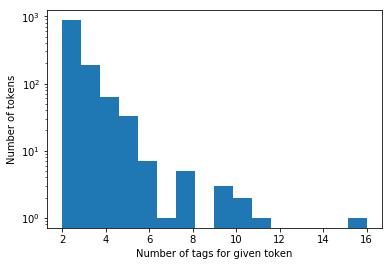

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_tags, bins = 16)
plt.yscale('log')
plt.xlabel('Number of tags for given token')
plt.ylabel('Number of tokens')
plt.show()

In [ ]:
# We can see that 'The' is a pretty extreme outlier